<a href="https://colab.research.google.com/github/chetan-parthiban/Conceptors/blob/master/Coding_up_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up BERT

In [0]:
!pip install flair

In [0]:
from flair.embeddings import BertEmbeddings
from flair.data import Sentence
embedding = BertEmbeddings('bert-large-uncased', layers = '20,21,22,23')

100%|██████████| 1248501532/1248501532 [00:27<00:00, 45560317.97B/s]


In [0]:
import numpy as np
import torch
import matplotlib.pyplot as plt
t = np.transpose
%matplotlib inline

# Get Brown Corpus And Associated Embeddings

In [0]:
from tqdm import tqdm
import nltk
nltk.download('brown')

from nltk.corpus import brown
brown_corpus = brown.sents()
brown_corpus = brown_corpus[:10000]

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [0]:
brown_e = []
for s in tqdm(brown_corpus):
    sentence = Sentence(' '.join(s))
    embedding.embed(sentence)
    sent_emb = torch.stack([token.embedding for token in sentence]).numpy()
    brown_e.append(sent_emb)

100%|██████████| 10000/10000 [11:39<00:00, 14.30it/s]


# Do Stuff With Them

In [0]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from   sklearn.decomposition import PCA
from   sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding
from   sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)
plt_style = 'seaborn-talk'

# Experimental: HDBScan is a state-of-the-art clustering algorithm
hdbscan_available = True
try:
    import hdbscan
except ImportError:
    hdbscan_available = False

In [0]:
def do_plot(X_fit, title=None, labels = ['']):
    dimension = X_fit.shape[1]
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    colors = cm.Accent(np.linspace(0,1,num_labels))
    print(X_fit.shape, label_types, num_labels, colors)
    with plt.style.context(plt_style):
        fig = plt.figure()
        if dimension == 2:
            ax = fig.add_subplot(111)
            
            for lab,col in zip(label_types, colors):
                if num_labels>1:
                    idxs = [i for i,v in enumerate(labels) if v == lab]
                    ax.scatter([X_fit[i,0] for i in idxs], 
                               [X_fit[i,1] for i in idxs], 
                               c = col, label = lab)
                else:
                    ax.scatter(X_fit[:,0],
                               X_fit[:,1],
                               c = col)
        elif dimension == 3:
            ax = fig.add_subplot(111, projection ='3d')
            for lab, col in zip(label_types,colors):
                ax.scatter(X_fit[labels==lab,0],
                           X_fit[labels==lab,1],
                           X_fit[labels==lab,2],
                           c=col)
        else:
            raise Exception('Bad Dimensions')
        plt.title(title)
        if num_labels >1:
            ax.legend()
        plt.show()

In [0]:
def pick_embeddings(corpus,sent_embs,word_list):
    X = []
    labels = []
    sents = []
    for i, s in enumerate(corpus):
        for j, w in enumerate(s):
            if w in word_list:
                X.append(sent_embs[i][j])
                labels.append(w)
                sents.append(s)
    return (X, labels, sents)

0.246719
(210, 2) ['John', 'Mary', 'husband', 'wife'] 4 [[0.498  0.7882 0.498  1.    ]
 [0.9922 0.7529 0.5255 1.    ]
 [0.9412 0.0078 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-05-21 17:20:56,841 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-05-21 17:20:56,858 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-05-21 17:20:56,871 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a

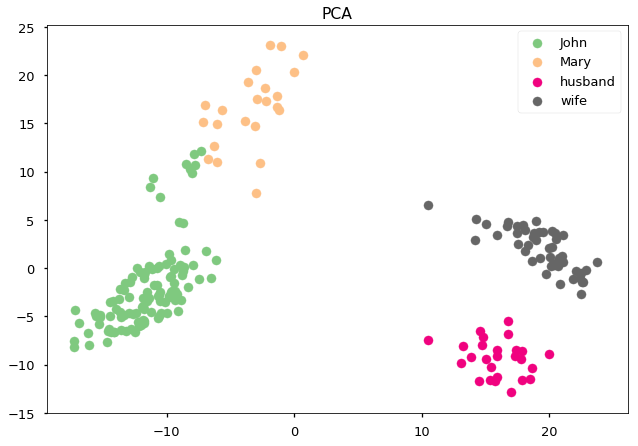

(240, 2) ['man', 'woman'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-05-21 17:20:57,862 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-05-21 17:20:57,873 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


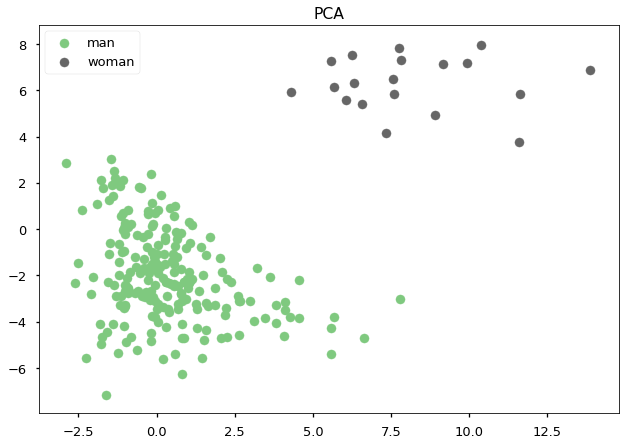

(93, 2) ['herself', 'himself'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-05-21 17:20:58,839 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-05-21 17:20:58,851 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


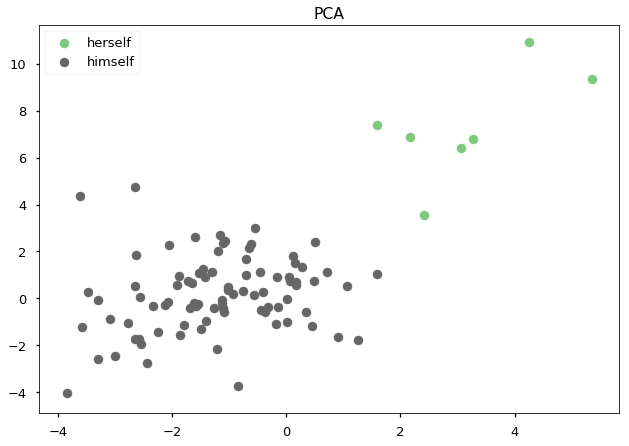

(46, 2) ['boy', 'girl'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-05-21 17:20:59,788 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-05-21 17:20:59,799 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


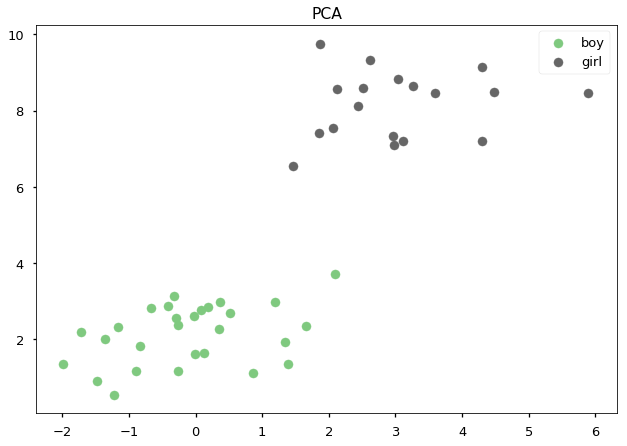

(135, 2) ['John', 'Mary'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-05-21 17:21:00,758 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-05-21 17:21:00,769 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


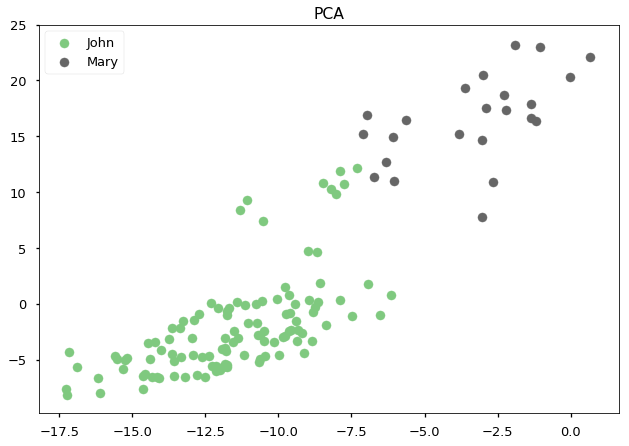

(75, 2) ['husband', 'wife'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-05-21 17:21:01,756 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-05-21 17:21:01,768 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


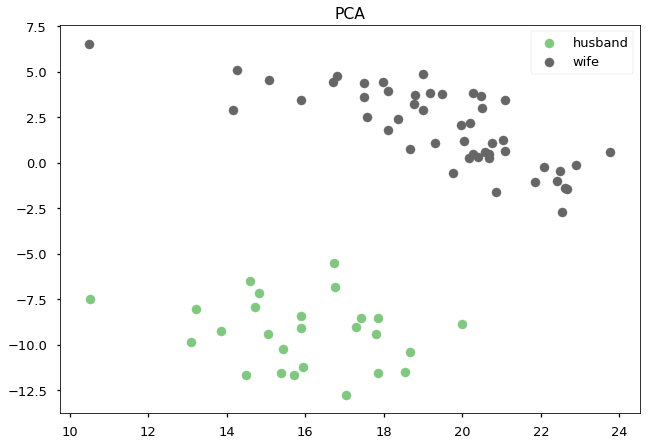

(72, 2) ['David', 'Robert'] 2 [[0.498  0.7882 0.498  1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-05-21 17:21:02,769 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-05-21 17:21:02,780 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


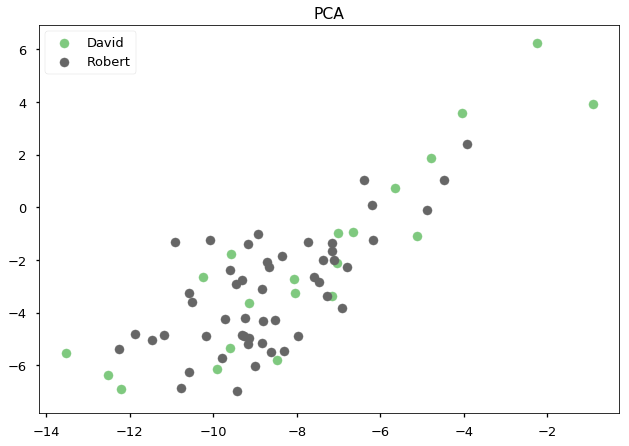

In [0]:
X, labels, _ = pick_embeddings(brown_corpus, brown_e, ['husband', 'wife', 'Mary', 'John'])
pca = PCA(n_components=2)
pca.fit(X)

do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_e, ['man', 'woman'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_e, ['himself', 'herself'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_e, ['boy', 'girl'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_e, ['Mary', 'John'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_e, ['husband', 'wife'])
do_plot(pca.transform(X), 'PCA', labels=labels)
X, labels, _ = pick_embeddings(brown_corpus, brown_e, ['David', 'Lauren', 'Robert', 'Bonnie'])
do_plot(pca.transform(X), 'PCA', labels=labels)

# Pull In Tools From Conceptor GitHub

In [0]:
# Gender word lists
!git clone https://github.com/uclanlp/gn_glove
!git clone https://github.com/uclanlp/corefBias
!wget https://www.cs.cmu.edu/Groups/AI/areas/nlp/corpora/names/female.txt
!wget https://www.cs.cmu.edu/Groups/AI/areas/nlp/corpora/names/male.txt
    
# our code for debiasing -- also includes word lists    
!git clone https://github.com/jsedoc/ConceptorDebias

fatal: destination path 'gn_glove' already exists and is not an empty directory.
fatal: destination path 'corefBias' already exists and is not an empty directory.
--2019-05-21 17:13:52--  https://www.cs.cmu.edu/Groups/AI/areas/nlp/corpora/names/female.txt
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35751 (35K) [text/plain]
Saving to: ‘female.txt.1’

female.txt.1        100%[===================>]  34.91K  --.-KB/s    in 0.05s   

2019-05-21 17:13:52 (706 KB/s) - ‘female.txt.1’ saved [35751/35751]

--2019-05-21 17:13:54--  https://www.cs.cmu.edu/Groups/AI/areas/nlp/corpora/names/male.txt
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20466 (20K) [text/plain]
Saving to: ‘male.txt.1’

male.txt.1          100

In [0]:
# Get Winobias word lists
winoWordsPath = './' + 'corefBias/WinoBias/wino/extra_gendered_words.txt'
male_vino_extra = []
female_vino_extra = []
with open(winoWordsPath, "r+") as f_in:
    for line in f_in:
        male_vino_extra.append(line.split('\t')[0])
        female_vino_extra.append(line.strip().split('\t')[1])

# Get CMU word lists
cmuMaleWordPath = './' + 'male.txt'
male_cmu = []
with open(cmuMaleWordPath, "r+") as f_in:
  for line in f_in:
    w = line.strip()
    if len(w)>0 and w[0] != '#':
      male_cmu.append(w)
cmuFemaleWordPath = './' + 'female.txt'
female_cmu = []
with open(cmuFemaleWordPath, "r+") as f_in:
  for line in f_in:
    w = line.strip()
    if len(w)>0 and w[0] != '#':
      female_cmu.append(w)
    
# Get gnGlove word lists
gnGloveFemaleWordPath = './' + 'gn_glove/wordlist/female_word_file.txt'
female_gnGlove = []
with open(gnGloveFemaleWordPath, "r+") as f_in:
    for line in f_in:
        female_gnGlove.append(line.strip())
gnGloveMaleWordPath = './' + 'gn_glove/wordlist/male_word_file.txt'
male_gnGlove = []
with open(gnGloveMaleWordPath, "r+") as f_in:
    for line in f_in:
        male_gnGlove.append(line.strip())
    
# Get WEAT lists and conceptor functionality
#from ConceptorDebias.plot_pc import *
from ConceptorDebias.Conceptors.conceptor_fxns import *
from ConceptorDebias.lists import WEAT_lists

In [0]:
WEATLists = WEAT_lists.WEATLists()
gender_list_pronouns = WEATLists.W_7_Male_terms + WEATLists.W_7_Female_terms + WEATLists.W_8_Male_terms + WEATLists.W_8_Female_terms
gender_list_pronouns = list(set(gender_list_pronouns))

gender_list_extended = male_vino_extra + female_vino_extra + male_gnGlove + female_gnGlove
gender_list_extended = list(set(gender_list_extended))

gender_list_propernouns = male_cmu + female_cmu
gender_list_propernouns = list(set(gender_list_propernouns))

gender_list_all = gender_list_pronouns + gender_list_extended + gender_list_propernouns
gender_list_all = list(set(gender_list_all))

race_list = WEATLists.W_3_Unused_full_list_European_American_names + WEATLists.W_3_European_American_names + WEATLists.W_3_Unused_full_list_African_American_names + WEATLists.W_3_African_American_names + WEATLists.W_4_Unused_full_list_European_American_names + WEATLists.W_4_European_American_names + WEATLists.W_4_Unused_full_list_African_American_names + WEATLists.W_4_African_American_names + WEATLists.W_5_Unused_full_list_European_American_names + WEATLists.W_5_European_American_names + WEATLists.W_5_Unused_full_list_African_American_names + WEATLists.W_5_African_American_names
race_list = list(set(race_list))

(1136, 2) ['executive', 'he', 'relatives', 'salary', 'she', 'wedding'] 6 [[0.498  0.7882 0.498  1.    ]
 [0.7451 0.6824 0.8314 1.    ]
 [1.     1.     0.6    1.    ]
 [0.2196 0.4235 0.6902 1.    ]
 [0.749  0.3569 0.0902 1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-05-21 17:13:58,140 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-05-21 17:13:58,164 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-05-21 17:13:58,178 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mappin

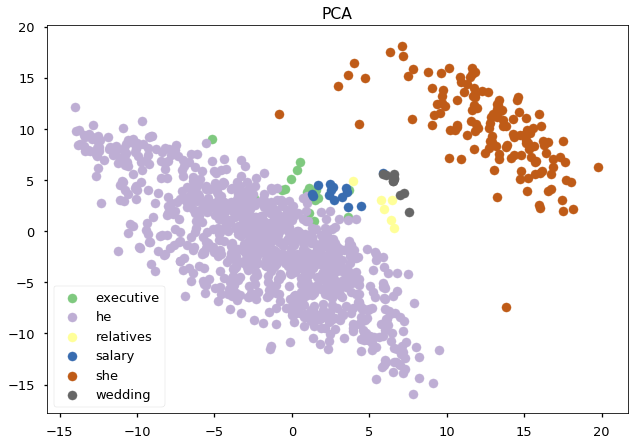

starting...
(4096, 1089)
R calculated
C calculated
negC calculated
(1089, 4096)
(1136, 2) ['executive', 'he', 'relatives', 'salary', 'she', 'wedding'] 6 [[0.498  0.7882 0.498  1.    ]
 [0.7451 0.6824 0.8314 1.    ]
 [1.     1.     0.6    1.    ]
 [0.2196 0.4235 0.6902 1.    ]
 [0.749  0.3569 0.0902 1.    ]
 [0.4    0.4    0.4    1.    ]]
2019-05-21 17:14:16,830 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-05-21 17:14:16,851 'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
2019-05-21 17:14:16,861 'c' argument looks lik

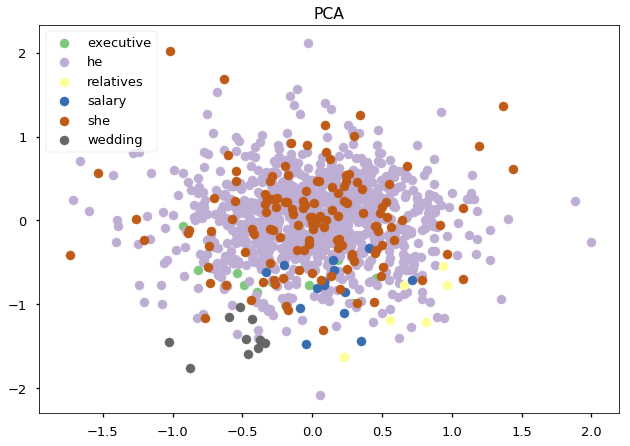

In [0]:
AB, AB_labels, _ = pick_embeddings(brown_corpus, brown_e, ['he', 'she'])
XY, XY_labels, _ = pick_embeddings(brown_corpus, brown_e, ['wedding', 'relatives','executive', 'salary', 'he', 'she'])#WEATLists.W_6_Career + WEATLists.W_6_Family)

pca = PCA(n_components=2)
pca.fit(AB)
do_plot(pca.transform(XY), 'PCA', labels=XY_labels)


Z = np.matrix(AB)
L = np.matrix(XY)
GnegC, GnewX, GR = post_process_cn_matrix(Z.T)

pca.fit(GnewX)
do_plot(pca.transform((GnegC*L.T).T), 'PCA', labels=XY_labels)
